In [85]:
# Data Science & Technologies
# Name - Kanishka Goyal
# UC ID - u3219632
# Predictive Modeling - Eating Out problem

In [86]:
# Description 

# This project is about the data analysis and predicitive modeling for the rating of the restaurants using the zomato dataset for Sydney.  The dataset contains 10500 rows and 17 columns. The columns of the dataset includes 
#'address': restaurant’s address (text) 
# 'cost': the average cost for two people in AUD (numeric)
#'cuisine': cuisines served by the restaurant (list)
# 'lat': Latitude (numeric) 
#'link': Url (text)
# 'lng' :  longitude (numeric) 
# 'phone':  phone number (numeric) 
# 'rating_number':  restaurant rating (numeric) 
#'rating_text': resturnat rating (text) 
# 'subzone': The suburb in which restaurant resides (text)
# 'title': restaurant’s name (text) 
# 'type': business type (list)
# 'votes': Number of users who provided the rating (numeric)
#'groupon':  is the restaurant promoting itself on Groupon.com? (boolean)


# It aims to solve ques like, How Many Unique Cuisines are served in Sydney 
# restaurants , Which Suburbs has the highest number of restaurants, by performing exploratory data analysis and descriptive statistics. 
# Exploratory data visualization techniques are employed to gain more insights into the data using packages  
# seaborn, pyplot etc. The density map is beeing created in another file using geopandas. The Tableau dashboard 
# is made and the link to the same is provided in pdf file uploaded along with this file. PartA includes the Linear Regression and Gradient Descent 
# Regression Techniques employed and the R-Squared and MSE values achieved are similar. In the Part B there are 
# six binary classification techniques are adopted to classify Poor and Average Restaurants to one class and rest 
# of the rated restaurants as another class. The Accuracy, Precission and Recall are calculated. Confusion matrixs' 
# are plotted for all the model classifiers. The concusion of the analysis is briefed at the end. The Results are 
# separately explained on the pdf uploaded.

In [87]:
import pandas as pd
import numpy as np
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
import plotly.express as px

In [88]:
zomato_df = pd.read_csv('zomato_df_final_data.csv')

In [89]:
# Data review

In [90]:
print(zomato_df.shape)

(10500, 17)


In [91]:
zomato_df.describe()

cost           lat           lng  rating_number        votes  \
count  10154.000000  10308.000000  10308.000000    7184.000000  7184.000000   
mean      51.153240    -32.921377    148.067359       3.283672    83.581013   
std       27.799485      8.263449     26.695402       0.454580   175.117966   
min        8.000000    -37.858473   -123.270371       1.800000     4.000000   
25%       30.000000    -33.899094    151.061061       3.000000    12.000000   
50%       45.000000    -33.872741    151.172468       3.300000    32.000000   
75%       60.000000    -33.813451    151.208940       3.600000    87.000000   
max      500.000000     51.500986    152.869052       4.900000  3236.000000   

             cost_2  
count  10154.000000  
mean       5.332974  
std        2.147115  
min        2.000000  
25%        3.699187  
50%        4.857724  
75%        6.016260  
max       40.000000

In [92]:
# PART A : Importing and Understanding Data

In [93]:
### Question 1 

In [94]:
# 1a How many unique cuisines are served by Sydney restaurants?

cuisine_list = [];

for obj in zomato_df['cuisine']:
    cuisine_list.extend(ast.literal_eval(obj))

In [95]:
print("Total no of unique cuisines are :-",len(set(cuisine_list)))

Total no of unique cuisines are :- 134


In [96]:
print("List of unique cuisines are:- ")
print(pd.Series(cuisine_list).value_counts())

List of unique cuisines are:- 
Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
                     ... 
Swiss                   1
Dutch                   1
Kiwi                    1
Syrian                  1
Ukrainian               1
Length: 134, dtype: int64


Text(0.5, 1.0, 'Frequency of cuisines')

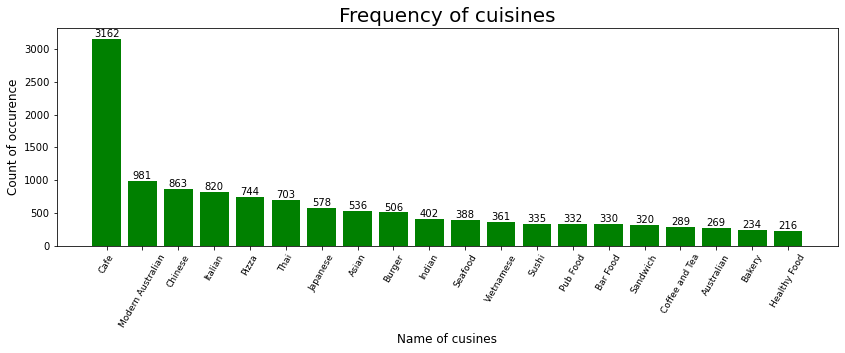

In [97]:
# Plot to represent the most popular unique cuisines 

# Code for plotting the unique cuisines

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(pd.Series(cuisine_list).value_counts().index[0:20],
        pd.Series(cuisine_list).value_counts().values[0:20], 
        color = "green")
ax.set_ylabel("Count of occurence", size = 12)
ax.set_xlabel("Name of cusines", size = 12)
plt.xticks(rotation=60, size=9)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Frequency of cuisines", size = 20)

In [98]:
# 1b Which suburbs have the highest number of restaurants?

suburb_count = zomato_df['subzone'].value_counts()
print("Top 3 suburbs with highest no. of restaurants are:-", suburb_count.index[:3].tolist())

Top 3 suburbs with highest no. of restaurants are:- ['CBD', 'Surry Hills', 'Parramatta']


Text(0.5, 1.0, 'Top 6 Suburbs with highest number of restraunts')

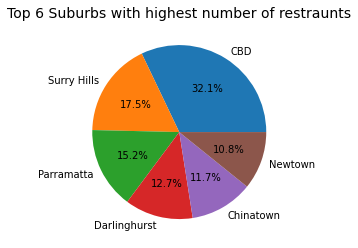

In [99]:
# Plot to show number of restaurants

fig, ax = plt.subplots(figsize = (14,4))
mylabels = suburb_count.index[0:6].tolist()
ax.pie(suburb_count.values[0:6], labels = mylabels, autopct='%1.1f%%')
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=60, size=9)
ax.set_title("Top 6 Suburbs with highest number of restraunts", size = 14)

In [100]:
# 1c Are restaurants with better rating more expensive?

zomato_df['cost'].min()
zomato_df['cost'].max()
zomato_df['cost'].mean()

zomato_df['cost_range'] = " "

for i in range(len(zomato_df)):
    if zomato_df.iloc[i]['cost'] < 40:
        zomato_df.at[i, 'cost_range'] = '0-40'
    elif zomato_df.iloc[i]['cost'] >=40 and zomato_df.iloc[i]['cost'] < 80:
        zomato_df.at[i, 'cost_range'] = '40-80'
    else:
        zomato_df.at[i, 'cost_range'] = '>80' 

tempObj = zomato_df.groupby(['rating_text', 'cost_range'])['cost_range'].agg({"count"})

finalSol1c = tempObj.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

print("Only",math.trunc(float(finalSol1c.values[11])),"% of restaurants are expensive wih poor rating, whereas",math.trunc(float(finalSol1c.values[5])),"% restaurants are expensive with excellent rating.")

Only 22 % of restaurants are expensive wih poor rating, whereas 39 % restaurants are expensive with excellent rating.


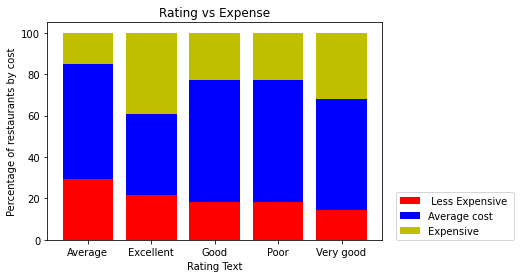

In [101]:
# Plot for 1c

x = ["Average", "Excellent", "Good", "Poor", "Very good"]

y1 = np.array(finalSol1c.iloc[::3]['count'])
y2 = np.array(finalSol1c.iloc[1::3]['count'])
y3 = np.array(finalSol1c.iloc[2::3]['count'])

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.xlabel("Rating Text")
plt.ylabel("Percentage of restaurants by cost")
plt.legend([" Less Expensive ", "Average cost", "Expensive"], loc=(1.04, 0))
plt.title("Rating vs Expense")
plt.show()

In [102]:
# Ques 2 
# Exploratory analysis for the data variables
# Analysis has been divided into three parts :-

Text(0.5, 1.0, 'Cost distribution')

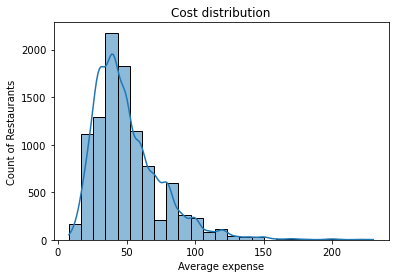

In [103]:
# 1. Singlevariant Analysis

# Cost distribution histogram 
tempDF = zomato_df[zomato_df['cost'] < 250]
sns.histplot(data = tempDF, x="cost", bins=25, kde=True)
plt.xlabel("Average expense")
plt.ylabel("Count of Restaurants")
plt.title("Cost distribution")

In [104]:
# This graph shows that cost variable is highly right skewed and there is a possibility of outliers. 
# The average cost seems to lie around 50 dollars for all the restaurants. 

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

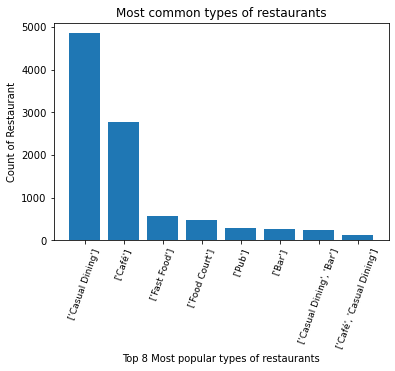

In [105]:
# Type distribution
top10Types = zomato_df.groupby(['type'])['type'].count().sort_values(ascending=False)[:8]
plt.bar(x = top10Types.index, height= top10Types.values)
plt.xlabel("Top 8 Most popular types of restaurants")
plt.ylabel("Count of Restaurant")
plt.title("Most common types of restaurants")
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=70, size=9)


In [106]:
# Most common type of restaurants in Sydeny shows that Casual Dining & Cafes are more common among other types.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, "['Casual Dining']"),
  Text(1, 0, "['Café']"),
  Text(2, 0, "['Casual Dining', 'Bar']"),
  Text(3, 0, "['Fast Food']"),
  Text(4, 0, "['Bar']"),
  Text(5, 0, "['Food Court']"),
  Text(6, 0, "['Café', 'Casual Dining']"),
  Text(7, 0, "['Pub']")])

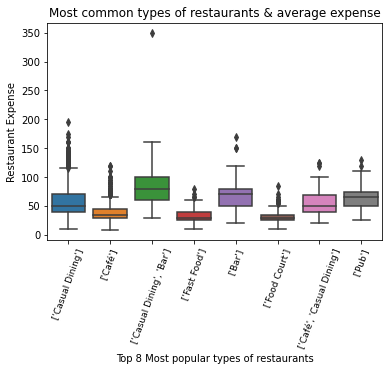

In [107]:
# 2. Bivariate Analysis

# Type vs Cost 

top10Types = zomato_df.groupby(['type'])['type'].count().sort_values(ascending=False)[:8]
tempDF = zomato_df[zomato_df['type'].isin(top10Types.index.tolist())]
sns.boxplot(data = tempDF, x="type", y="cost")
plt.xlabel("Top 8 Most popular types of restaurants")
plt.ylabel("Restaurant Expense")
plt.title("Most common types of restaurants & average expense")
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=70, size=9)


In [108]:
# The graph shown above shows that type of the restaurant makes a good impact on the expense. 
# Fine Dining is topping the charts in expense. 

Text(0.5, 1.0, 'Average expense vs Rating of Restaurant')

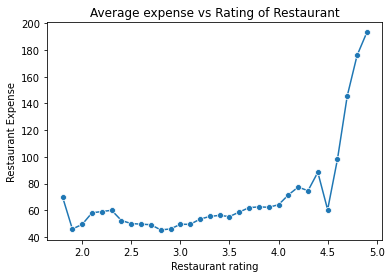

In [109]:
# Rating vs Average Cost
tempDF = zomato_df.groupby('rating_number', as_index=False)['cost'].mean()
sns.lineplot(data = tempDF, x="rating_number", y="cost", marker="o")
plt.xlabel("Restaurant rating")
plt.ylabel("Restaurant Expense")
plt.title("Average expense vs Rating of Restaurant")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, "['Modern Australian']"),
  Text(1, 0, "['Cafe']"),
  Text(2, 0, "['Chinese']"),
  Text(3, 0, "['Italian', 'Pizza']"),
  Text(4, 0, "['Italian']"),
  Text(5, 0, "['Thai']"),
  Text(6, 0, "['Indian']"),
  Text(7, 0, "['Pub Food']")])

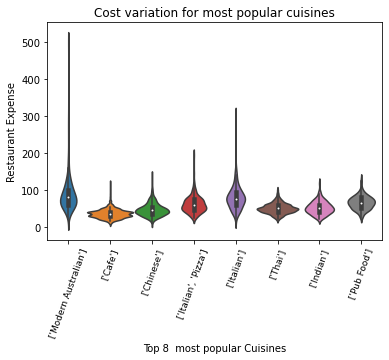

In [110]:
# Cuisine vs average cost 
top10Types = zomato_df.groupby(['cuisine'])['cuisine'].count().sort_values(ascending=False)[:8]
tempDF = zomato_df[zomato_df['cuisine'].isin(top10Types.index.tolist())]
sns.violinplot(x ='cuisine', y ='cost', data = tempDF, inner="box", width = 1.1)
plt.xlabel("Top 8  most popular Cuisines")
plt.ylabel("Restaurant Expense")
plt.title("Cost variation for most popular cuisines")
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=70, size=9)

In [111]:
# This shows that modern ausie places have the biggest range of cost which can vary from as low as 10 dollars to as high as 300.

Text(0.5, 1.0, 'Frequency of rating among different cost ranges')

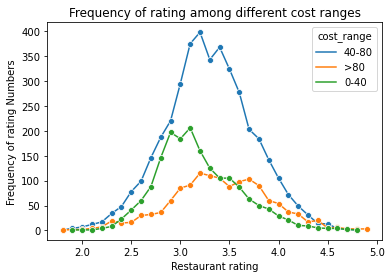

In [112]:
# Multivariate Analysis
# Rating distribution
tempDF = zomato_df.groupby(['rating_number','cost_range'], as_index=False).size()
sns.lineplot(data = tempDF, x="rating_number", y="size", marker = "o", hue = "cost_range")
plt.xlabel("Restaurant rating")
plt.ylabel("Frequency of rating Numbers")
plt.title("Frequency of rating among different cost ranges")

In [113]:
# This shows that all the restaurants are on average rated around 3. There is a bit difference in rating depending 
# on the cost range. 
# Average restaurants are rated a little low than the expensive restaurants. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Blacktown'),
  Text(1, 0, 'Bondi Beach'),
  Text(2, 0, 'CBD'),
  Text(3, 0, 'Chinatown'),
  Text(4, 0, 'Darlinghurst'),
  Text(5, 0, 'Manly'),
  Text(6, 0, 'Newtown'),
  Text(7, 0, 'Parramatta'),
  Text(8, 0, 'Potts Point'),
  Text(9, 0, 'Surry Hills')])

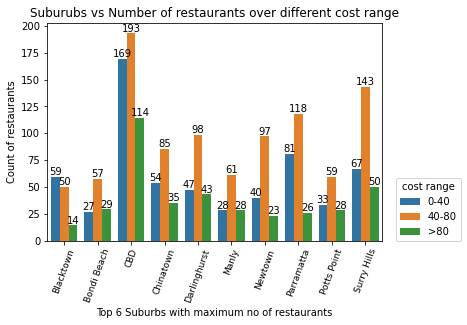

In [114]:
# suburb vs cost partitioned on cost range

top10Types = zomato_df.groupby(['subzone'])['subzone'].count().sort_values(ascending=False)[:10]
tempDF = zomato_df[zomato_df['subzone'].isin(top10Types.index.tolist())]
tempDF = tempDF.groupby(['subzone', 'cost_range']).size().to_frame(name = 'size').reset_index()
ax = sns.barplot(data = tempDF, x="subzone", y="size" , hue = "cost_range")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Top 6 Suburbs with maximum no of restaurants")
plt.ylabel("Count of restaurants")
plt.title("Suburubs vs Number of restaurants over different cost range")
plt.legend(title = 'cost range', loc=(1.04, 0))
plt.xticks(rotation=0, size=11)
plt.xticks(rotation=70, size=9)

In [115]:
# Every suburb has a different type of price range. It shows that some subones are more expensive than the others.

In [116]:
# III Cuisine density map

#Uploaded in separate file

In [117]:
# Part B - Predictive Modelling -----------------------------------------------

# I Feature Engineering

# Data Cleaning

# Count Na values
zomato_df.isna().sum() 

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
cost_range          0
dtype: int64

In [118]:
# Drop by threshold

# Removing columns & rows which have more than 70% data missing. 
threshold = 0.7

In [119]:
#Dropping columns with missing value rate higher than threshold
zomato_df = zomato_df[zomato_df.columns[zomato_df.isnull().mean() < threshold]]
#Dropping rows with missing value rate higher than threshold
zomato_df = zomato_df.loc[zomato_df.isnull().mean(axis=1) < threshold]

In [120]:
# No columns were removed as none of the columns or rows satisfy the threshold condition

# Replacing na values for each variable 

# Cost & cost_2
# On plotting the histogram for cost, it was seen that most of the restaurants 
# expense fall around the average with very low variance. 
# So replacing null rows for cost with average cost. 

zomato_df['cost'].fillna(zomato_df['cost'].mean(), inplace = True)
zomato_df['cost_2'].fillna(zomato_df['cost_2'].mean(), inplace = True)

In [121]:
# Lat & Long 

# Lat & Long has a relation with the suburb. So lat and long values can be replaced
# by the average lat and average lng for each suburb that they lie in.

for i in range(len(zomato_df)):
    if pd.isnull(zomato_df.iloc[i]['lat']):
        tempObj = zomato_df[zomato_df['subzone'] == zomato_df.iloc[i]['subzone']]
        zomato_df.at[i, 'lat'] = zomato_df['lat'].mean()
    if pd.isnull(zomato_df.iloc[i]['lng']):
        tempObj = zomato_df[zomato_df['subzone'] == zomato_df.iloc[i]['subzone']]
        zomato_df.at[i, 'lng'] = zomato_df['lng'].mean()

In [122]:
# Find % of Missing values for type

round(zomato_df['type'].isnull().mean(), 3)

0.005

In [123]:
# Type has only 0.005% missing values, so removing those specific rows would not
# affect the dataset

# rating number,rating text and votes have the same rows 
# with missing values. Because rating is a target variable, rather than imputing
# those 3 attributes, its better to remove those rows as they already have 3 important missing
# attributes

zomato_df.dropna(inplace=True)
zomato_df.reset_index(drop=True, inplace=True)

In [126]:
# Feature Encoding

# Label encoding for Rating text
# creating instance of labelencoder

labelencoder = LabelEncoder() 

zomato_df['encoded_rating'] = labelencoder.fit_transform(zomato_df['rating_text'])

# This is not a good way of encoding because rating_text has an order but this encoding will 
# not give the same order while encoding

In [127]:
# Doing manual encoding
for i in range(len(zomato_df)):
    
    if zomato_df.at[i, 'rating_text'] == 'Poor':
       zomato_df.at[i, 'encoded_rating'] = 1
    elif zomato_df.at[i, 'rating_text'] == 'Average':
        zomato_df.at[i, 'encoded_rating'] = 2
    elif zomato_df.at[i, 'rating_text'] == 'Good':
        zomato_df.at[i, 'encoded_rating'] = 3
    elif zomato_df.at[i, 'rating_text'] == 'Very Good':
        zomato_df.at[i, 'encoded_rating'] = 4
    else:
        zomato_df.at[i, 'encoded_rating'] = 5

In [128]:
# Because cost variable is highly skewed, taking log of cost to remove the noise in data.

zomato_df['cost'] = np.log(zomato_df['cost'])

   

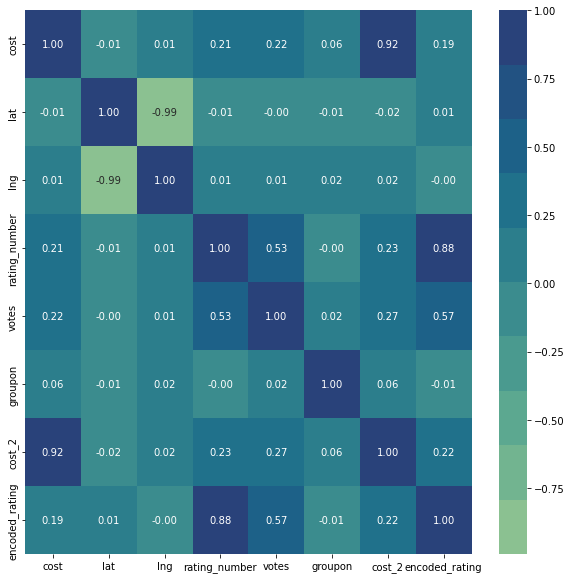

In [129]:
# II Regression----------------------------------------------------------------


# Heatmap to understand the correlation b/w all variables

corr_matrix = zomato_df.corr()

# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("crest", 10)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show()

In [130]:
    
# Copying the data frame for modelling

zomato_df_LR = zomato_df.copy()

In [131]:
# Dropping the columns that cannot be uesed in regression modelling to predict
# the target variable. 

zomato_df_LR.drop(['address','phone','link','title','color',
                        'cuisine_color','cuisine','cost_2','subzone','groupon','type','rating_text','lat','lng','cost_range'], inplace=True, axis=1)

In [132]:
zomato_df_LR.head(1)

cost  rating_number   votes  encoded_rating
0  3.912023            4.0  1311.0               4

In [133]:
# Selecting the x and y from the dataset

x = zomato_df_LR.drop('rating_number', axis =1)
y = zomato_df_LR['rating_number']

In [134]:
# Splitting the data 80:20 training and testing
# Setting the random state as 0

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [136]:
# Building a linear regression model to predict 'rating_number' and predicting on test data

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(x_train, y_train) #Fitting the model

LinearRegression()

In [137]:
#Printing the R-sqaured , MSE and accuracy
print('R-Squared value for Linear Regression Model is : \n', model_LR.score(x_train, y_train))
y_pred = model_LR.predict(x_test) #Predicting using the test data
print('Mean-Squared-Error value for Linear Regression Model is : \n',mean_squared_error(y_test, y_pred))
print('Accuracy for Linear Regression Model is : \n', round(model_LR.score(x_train, y_train)*100,2))

R-Squared value for Linear Regression Model is : 
 0.7747750970635092
Mean-Squared-Error value for Linear Regression Model is : 
 0.0446443293475867
Accuracy for Linear Regression Model is : 
 77.48


In [138]:

# Gradient Descent Model ------------------------------------------------------

#Gradiant Descent model fitting and prediction
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [139]:
model_GradD = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=500, tol=1e-3))

model_GradD.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=500))])

In [140]:
#Printing the R-sqaured , MSE and accuracy
print('R-Squared value for Gradient Descent Model is : \n', model_GradD.score(x_train, y_train))
y_pred = model_GradD.predict(x_test)
print('Root-Mean-Squared-Error value for Gradient Descent Model is : \n',mean_squared_error(y_test, y_pred))
print('Accuracy for Gradient Descent Model is : \n', round(model_GradD.score(x_train, y_train)*100,2))

R-Squared value for Gradient Descent Model is : 
 0.7743588250440963
Root-Mean-Squared-Error value for Gradient Descent Model is : 
 0.04461526420806178
Accuracy for Gradient Descent Model is : 
 77.44


In [141]:
# III Classification ----------------------------------------------------------

zomato_df_CF = zomato_df.copy()

for i in range(len(zomato_df_CF)):
    if zomato_df_CF.at[i, 'encoded_rating'] == 1 or zomato_df_CF.at[i, 'encoded_rating'] == 2:
       zomato_df_CF.at[i, 'encoded_rating'] = 0
    else:
        zomato_df_CF.at[i, 'encoded_rating'] = 1

zomato_df_CF.drop(['cost_2','address','phone','link','title','color',
                           'cuisine_color','cuisine','lat','lng','subzone','rating_text','groupon','type','cost_range'], inplace=True, axis=1)

In [142]:
#considering rating_text as the target variable

X = zomato_df_CF.drop('encoded_rating', axis =1)
y = zomato_df_CF['encoded_rating'] 

In [143]:
#split the dataset 80 and 20 percent training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0) #splittind dataset 80:20

In [144]:
#Normalize the data for numerical stability
from sklearn.preprocessing import StandardScaler


In [145]:
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [146]:
#initialising the dictionary with keys for 6 binary classification techniques
models = {}

In [147]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic_Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support_Vector_Machines'] = LinearSVC(dual=False)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision_Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random_Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K_Nearest_Neighbor'] = KNeighborsClassifier()

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix

accuracy, precision, recall = {}, {}, {}

In [149]:
for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    #Prepare Confusion Matrix for each model
    #ConfMatx[key] = confusion_matrix(y_test, predictions, labels=models[key].classes_)

In [150]:
#Printing accuracy, precision and recall values for all the binary classification models.
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
#df_model['ConfMatrix'] = ConfMatx.values()
df_model


Accuracy  Precision    Recall
Logistic_Regression      1.000000   1.000000  1.000000
Support_Vector_Machines  1.000000   1.000000  1.000000
Decision_Trees           1.000000   1.000000  1.000000
Random_Forest            1.000000   1.000000  1.000000
Naive Bayes              0.882763   0.699029  0.965147
K_Nearest_Neighbor       0.997209   0.998058  0.994197

/Users/nish/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/nish/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/nish/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1

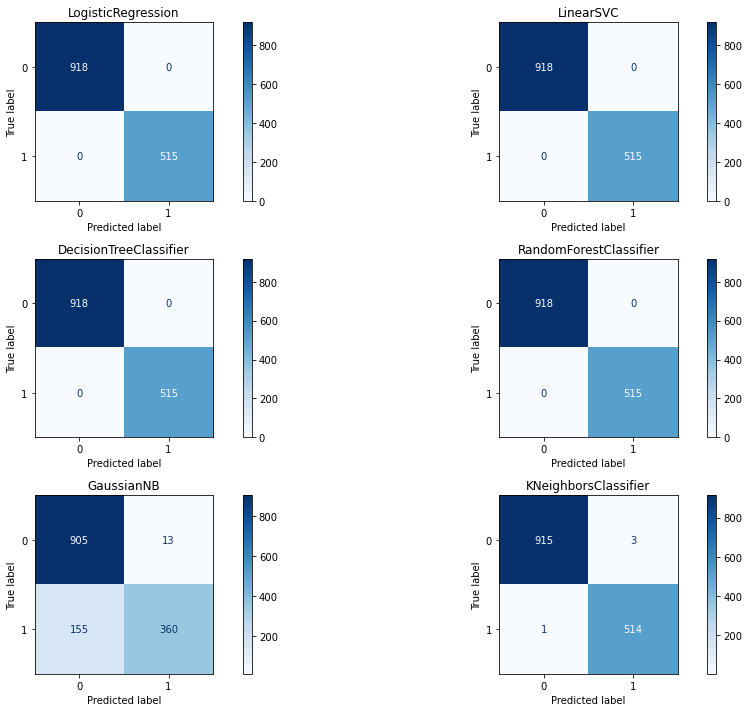

In [151]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
#temp_list = ["Poor", "Average", "Good", "Very Good", "Excellent"]

classifiers = [LogisticRegression(), 
               LinearSVC(dual=False),
               DecisionTreeClassifier(), 
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier()]
for cls, ax in zip(classifiers, axes.flatten()):
    cls.fit(X_train, y_train)
    predictions = cls.predict(X_test)
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=cls.classes_)
    ax.title.set_text(type(cls).__name__)
    
plt.tight_layout()  
plt.show() 

In [153]:
# For the Binary classification other than log transformed variables , rest of the columns are considered. 
# Even the other columns which are dropped for Linear regression are dropped here as well. 
# As the cuisine and subzon has more number of unique values one hot encoding is not employed here, to avoid over 
# fitting. The training and testing data is partitioned 80:20 ratio.


# Conclusion: The results for the binary classification techniques are as follows in the table.

In [152]:
# The results of binary classification techniques:-

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
#df_model['ConfMatrix'] = ConfMatx.values()
df_model


Accuracy  Precision    Recall
Logistic_Regression      1.000000   1.000000  1.000000
Support_Vector_Machines  1.000000   1.000000  1.000000
Decision_Trees           1.000000   1.000000  1.000000
Random_Forest            1.000000   1.000000  1.000000
Naive Bayes              0.882763   0.699029  0.965147
K_Nearest_Neighbor       0.997209   0.998058  0.994197

In [ ]:
# According to the confusion matrix plotted above Naive_Bayes is the worst classification technique among all as 
# 492 False negatives are found and zero False Positives.  Logistic Regression and Support Vector Classification 
# techniques are with highest accuracy, 
# Precision and Recall values. Even the TP and TN numbers predicted are high as in the confusion matrix shown 
# above.